In [2]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("diabetes.csv")
array = data.values
X, y = array[:,0:2] , array[:,8]


In [4]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs


In [5]:
epochs = 200000
input_dim = 2 # Two inputs x1 and x2
output_dim = 1 # Single binary output
learning_rate = 0.01


In [6]:
model = LogisticRegression(input_dim,output_dim)
criterion = torch.nn.BCELoss()# binary cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [8]:
X_train, X_test = torch.Tensor(X_train),torch.Tensor(X_test)
y_train, y_test = torch.Tensor(y_train),torch.Tensor(y_test)


In [9]:
losses = []
losses_test = []
Iterations = []
iter = 0
for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) # [200,1] -squeeze-> [200]
    loss.backward() # Computes the gradient of the given tensor w.r.t. graph leaves
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    iter+=1
    if iter%10000==0:
        # calculate Accuracy
        with torch.no_grad():
    # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy:     {accuracy_test}")
            print(f"Train - Loss: {loss.item()}. Accuracy: {accuracy}\n")



Training Epochs:   5%|▌         | 10272/200000 [00:06<01:53, 1666.81it/s]

Iteration: 10000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  10%|█         | 20216/200000 [00:13<02:06, 1422.56it/s]

Iteration: 20000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  15%|█▌        | 30239/200000 [00:19<01:41, 1666.04it/s]

Iteration: 30000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  20%|██        | 40121/200000 [00:26<01:53, 1406.32it/s]

Iteration: 40000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  25%|██▌       | 50308/200000 [00:32<01:25, 1751.97it/s]

Iteration: 50000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  30%|███       | 60252/200000 [00:38<01:23, 1680.97it/s]

Iteration: 60000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  35%|███▌      | 70287/200000 [00:44<01:23, 1546.04it/s]

Iteration: 70000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  40%|████      | 80256/200000 [00:51<01:13, 1636.20it/s]

Iteration: 80000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  45%|████▌     | 90088/200000 [00:57<01:29, 1227.14it/s]

Iteration: 90000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  50%|█████     | 100108/200000 [01:04<01:14, 1349.82it/s]

Iteration: 100000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  55%|█████▌    | 110250/200000 [01:10<00:51, 1755.70it/s]

Iteration: 110000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  60%|██████    | 120274/200000 [01:17<00:55, 1439.75it/s]

Iteration: 120000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  65%|██████▌   | 130119/200000 [01:25<01:08, 1021.92it/s]

Iteration: 130000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  70%|███████   | 140252/200000 [01:33<00:38, 1563.42it/s]

Iteration: 140000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  75%|███████▌  | 150224/200000 [01:41<00:45, 1096.79it/s]

Iteration: 150000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  80%|████████  | 160287/200000 [01:49<00:23, 1689.24it/s]

Iteration: 160000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  85%|████████▌ | 170105/200000 [01:58<00:35, 842.76it/s] 

Iteration: 170000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  90%|█████████ | 180241/200000 [02:08<00:11, 1712.63it/s]

Iteration: 180000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs:  95%|█████████▌| 190289/200000 [02:16<00:06, 1538.69it/s]

Iteration: 190000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



Training Epochs: 100%|██████████| 200000/200000 [02:22<00:00, 1400.55it/s]

Iteration: 200000. 
Test - Loss: 0.5185271501541138. Accuracy:     74.01574803149606
Train - Loss: 0.508313000202179. Accuracy: 74.90272373540856



In [12]:
for name, param in model.named_parameters():
    print(name)

linear.weight
linear.bias


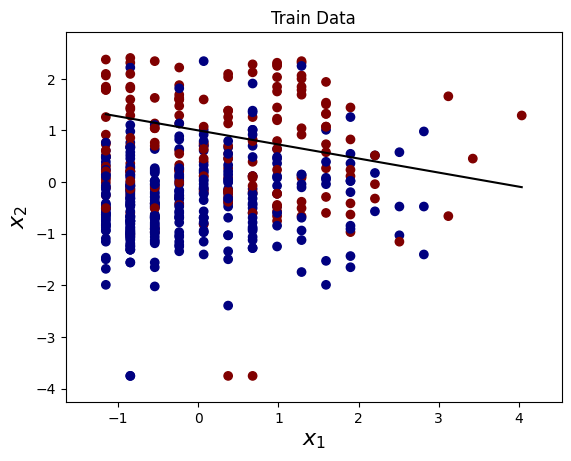

In [15]:
def model_plot(model, X, y, title):
    parm = {}
    for name, param in model.named_parameters():
        parm[name] = param.detach().numpy()
    
    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')
    u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
    plt.plot(u, (0.5 - b - w[0]*u) / w[1], color='black')
    plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
    plt.xlabel(r'$x_1$', fontsize=16)
    plt.ylabel(r'$x_2$', fontsize=16)
    plt.title(title)
    plt.show()

# Train Data
model_plot(model,X_train,y_train,'Train Data')

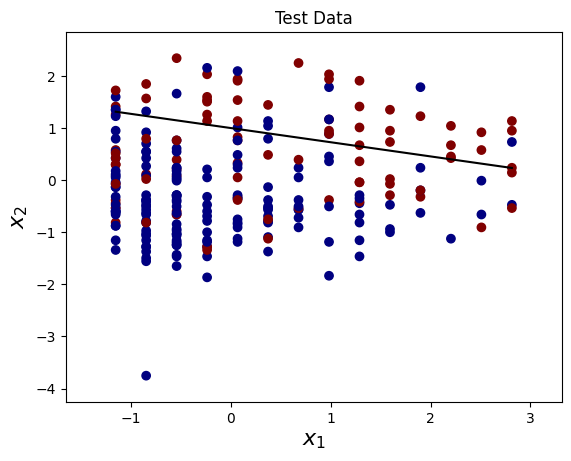

In [16]:
# Test Dataset Results
model_plot(model,X_test,y_test,'Test Data')
